<a href="https://colab.research.google.com/github/Leandro-Braga/Estudo_de_Caso/blob/main/Atividade_Leandro_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comando para Reiniciar o KERNEL do Colab**

In [54]:
# condacolab KERNEL RESTART
print("🔁 Restarting kernel...")
get_ipython().kernel.do_shutdown(True)

🔁 Restarting kernel...


{'restart': True, 'status': 'ok'}

**Tema: Redes Neurais**

O Dataset Fashion-MNIST é um conjunto de dados de imagens de artigos, consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem de 28x28, associada a um rótulo de 10 classes. Fashion-MNIST serve como um substituto direto para o conjunto de dados MNIST original para benchmarking de algoritmos de aprendizado de máquina. Ele compartilha o mesmo tamanho de imagem e estrutura das divisões de treinamento e teste.

Cada imagem tem 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total.

Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais altos significando mais escuro. Este valor de pixel é um número inteiro entre 0 e 255.

A primeira coluna é composta pelos rótulos das classes, e representa a peça de vestuário. O restante contém os valores de pixel da imagem associada.

--- Criado por: Leandro Braga Alves ---


### Classificador de imagens usando rede neural

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# ignorando avisos
import warnings
warnings.filterwarnings('ignore')

print('\033[34mBibliotecas importadas!\033[m')

Bibliotecas importadas!


In [2]:
# Verificando a versão do KERAS 
keras.__version__

'2.7.0'

In [3]:
# Verificando a versão do Tensoflow 
tf.__version__

'2.7.0'

In [4]:
# Carregando a base de dados

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test, y_test) = fashion_mnist.load_data()

A dimensão do treinamento original e do conjunto de teste são os seguintes:

In [5]:
print("x_train = ",x_train_full.shape,"y_train = ",y_train_full.shape,"x_test = ",x_test.shape,"y_test = ",y_test.shape)

x_train =  (60000, 28, 28) y_train =  (60000,) x_test =  (10000, 28, 28) y_test =  (10000,)


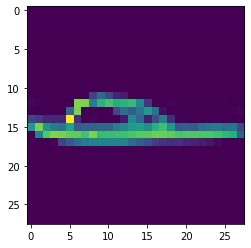

In [6]:
plt.imshow(x_train_full[30])

In [7]:
y_train_full[30]

5

Existem 10 classes diferentes de imagens, segue:

In [8]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
class_names[y_train_full[30]]

'Sandal'

In [10]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

### NORMALIZAÇÃO DE DADOS

Em seguida, normalizamos as duas partes do treinamento, além de testar imagens de dados e as convertemos em dimensões aceitas pelo Keras. Depois disso, convertemos rótulos em valores categóricos. Verifique o código abaixo para fazer o mesmo.

In [11]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.

Visualização dos dados

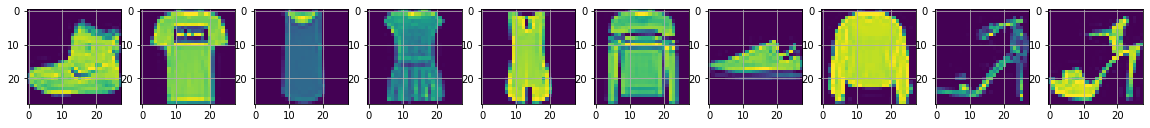

In [12]:
fig, axs = plt.subplots(1, 10, figsize=(20, 10))
for ax, i in zip(axs, range(10)):
    ax.imshow(x_train_n[i])
    ax.grid(True)

plt.show()

Dividindo os dados em conjuntos de treinamento/validação/teste


*   Dados de treinamento = usado para treinar o modelo
*   Dados de validação = usado para ajustar os hiperparâmetros e avaliar o modelo
*   Dados de teste = usado para testar o modelo após o modelo ter passado pela verificação inicial do conjunto de validação



Dividimos nossos dados de treinamento em conjuntos de dados de treinamento e validação, a fim de treinar nosso modelo e validá-lo usando o conjunto de dados de validação para evitar o overfitting antes de testar o modelo nos conjuntos de dados de teste, que são os dados do mundo real para nosso modelo.

In [13]:
x_valid, x_train = x_train_n[:5000],x_train_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test_n

In [14]:
unique, counts = np.unique(x_test, return_counts=True)
df = pd.Series(zip(unique, counts))
print(df)
# Todos os tipos de roupas que têm a mesma contagem presente no conjunto de dados

0                     (0.0, 3919183)
1       (0.00392156862745098, 79560)
2       (0.00784313725490196, 48331)
3      (0.011764705882352941, 32159)
4       (0.01568627450980392, 22181)
                   ...              
251        (0.984313725490196, 6953)
252       (0.9882352941176471, 7414)
253       (0.9921568627450981, 8451)
254       (0.996078431372549, 11069)
255                     (1.0, 62787)
Length: 256, dtype: object


In [15]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [16]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### CRIANDO A ARQUITETURA MODELO

1. API DE MODELO SEQUENCIAL (SIMPLES E DIRETO)
2. API FUNCIONAL (NN COMPLEXO)

In [17]:
np.random.seed(42) # random seed é usado para replicar sempre o mesmo resultado
tf.random.set_seed(42)

**Construir o modelo**

Usaremos um modelo Sequencial.

O modelo Sequencial é uma pilha linear de camadas. Ele pode ser inicializado primeiro e, em seguida, adicionamos camadas usando o método add ou podemos adicionar todas as camadas no estágio de inicialização. As camadas adicionadas são as seguintes:

In [18]:
model = keras.models.Sequential() # USANDO API SEQUENCIAL
model.add(keras.layers.Flatten(input_shape=[28,28])) # camada de entrada, convertendo 2D para 28*28 pixels usando flatten
model.add(keras.layers.Dense(300,activation="relu")) # 1ª camada oculta, 300=não de neurônios, relu = função de ativação
model.add(keras.layers.Dense(100,activation="relu")) # 2ª camada oculta
model.add(keras.layers.Dense(10,activation="softmax")) # camada de saída, categorias=10
# relu = 0 para todos os números negativos ou relu = saída para os números positivos

A construção da rede neural requer a configuração das camadas do modelo e, em seguida, a compilação do modelo.

**Inspecionando o modelo**

Vamos verificar o modelo que inicializamos

In [19]:
model.summary()

# parâmetros
# dense = 784*300+300 = 235500
# dense_1 = 300*100+100 = 30100
# dense_2 = 100*10+10 = 1010
# none  = sem limite nos dados de entrada

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Visualizando a estrutura da rede neural (usando pydot)

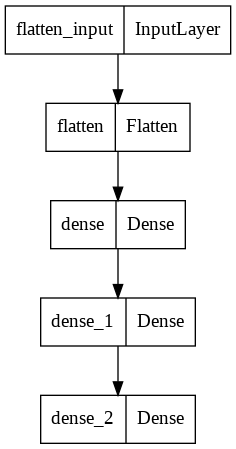

In [20]:
keras.utils.plot_model(model)

In [21]:
# Verificando as camadas do modelo 
weights, biases = model.layers[1].get_weights()

In [22]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
# Verificando a dimensão e tamanho do modelo.
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

Processos de aprendizagem

O bloco de construção básico de uma rede neural é a camada. As camadas extraem representações dos dados alimentados nelas. Esperamos que essas representações sejam significativas para o problema em questão.

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])

# scc = para dados categóricos
# sgd = descida de gradiente estocástica
# para rótulos binários = binary_cross_entropy

In [27]:
print("Fashion MNIST treinamento -  rows:",x_train.shape[0]," columns:", x_train.shape[1:4])
print("Fashion MNIST validação -  rows:",x_valid.shape[0]," columns:", x_valid.shape[1:4])
print("Fashion MNIST teste -  rows:",x_test.shape[0]," columns:", x_test.shape[1:4])

Fashion MNIST treinamento -  rows: 55000  columns: (28, 28)
Fashion MNIST validação -  rows: 5000  columns: (28, 28)
Fashion MNIST teste -  rows: 10000  columns: (28, 28)


Text(0.5, 1.0, 'Distribuição de classe no conjunto de testes')

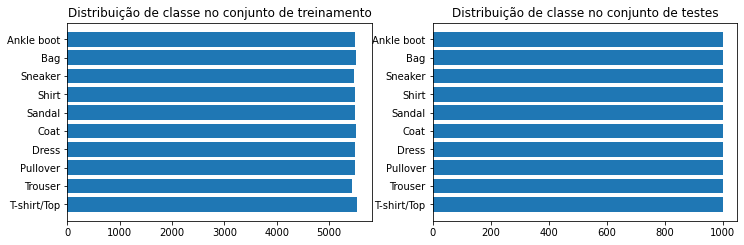

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Distribuição de classe no conjunto de treinamento')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Distribuição de classe no conjunto de testes')

Executamos o modelo com o conjunto de treinamento. Também estamos usando o conjunto de validação (um subconjunto do conjunto de treinamento original) para validação.

In [29]:
model_history = model.fit(x_train, y_train, 
                          epochs=30, validation_data = (x_valid, y_valid))
# por padrão epochs = 1 

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5209 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4344 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4390 - accuracy: 0.8456 - val_loss: 0.5260 - val_accuracy: 0.8010
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4123 - accuracy: 0.8567 - val_loss: 0.3915 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3940 - accuracy: 0.8621 - val_loss: 0.3742 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3750 - accuracy: 0.8676 - val_loss: 0.3704 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8711 - val_loss: 0.3615 - val_accuracy:

In [30]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [31]:
model_history.history

{'accuracy': [0.7643272876739502,
  0.8317636251449585,
  0.8455818295478821,
  0.8567454814910889,
  0.8620908856391907,
  0.867581844329834,
  0.8711272478103638,
  0.8753272891044617,
  0.8788363933563232,
  0.881672739982605,
  0.8838909268379211,
  0.8867999911308289,
  0.8898363709449768,
  0.8920000195503235,
  0.8942727446556091,
  0.8968181610107422,
  0.8977636098861694,
  0.8998000025749207,
  0.9022363424301147,
  0.9036363363265991,
  0.9054363369941711,
  0.9076363444328308,
  0.9083818197250366,
  0.9099454283714294,
  0.9124909043312073,
  0.9142181873321533,
  0.9151636362075806,
  0.9162726998329163,
  0.9188363552093506,
  0.9195818305015564],
 'loss': [0.7236968874931335,
  0.48415565490722656,
  0.43903887271881104,
  0.41231685876846313,
  0.39395442605018616,
  0.3749968707561493,
  0.3631158769130707,
  0.35170629620552063,
  0.3412413001060486,
  0.3320331275463104,
  0.3239188492298126,
  0.3147912323474884,
  0.3078494966030121,
  0.30186012387275696,
  0.294

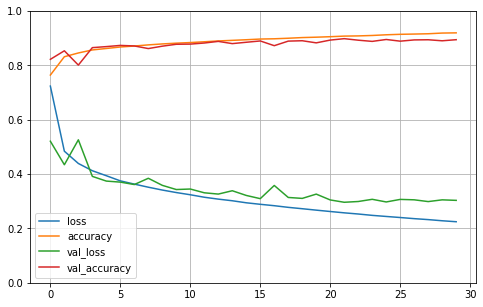

In [32]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Analisando o gráfico dos parâmetros do modelo verificamos que a perda cai bastante, mas mesmo assim o modelo não tem um resultado satisfatório. Iremos seguir com a ajustes com os melhores parâmetros encontrados.

In [35]:
# Calculamos a perda e a precisão do teste 1º Treinamento

score = model.evaluate(x_train,y_train, verbose=0)
print('1º Treinamento loss:', score[0])
print('1º Treinamento accuracy:', score[1])

1º Treinamento loss: 0.22021272778511047
1º Treinamento accuracy: 0.9187454581260681


In [36]:
# Calculamos a perda e a precisão do teste

score = model.evaluate(x_test, y_test, verbose=0)
print('1º Teste loss:', score[0])
print('1º Teste accuracy:', score[1])

1º Teste loss: 0.3365592360496521
1º Teste accuracy: 0.8820000290870667


A precisão do teste é de cerca de 0,88.

A precisão do treinamento apresenta um grande desempenho em comparação com o teste, isso confirma nossa suposição de que o modelo está superajustado. Tentaremos melhorar o modelo adicionando camadas de Dropout.

#### RETREINAMENTO

In [37]:
print(x_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


Adicionando camadas Dropout ao modelo:

Adicionamos várias camadas Dropout ao modelo, para ajudar a evitar overfitting.
O dropout está ajudando a evitar o overfitting de várias maneiras, conforme explicado nas referências [6] e [7].

A verdadeira força do Dropout aparece quando temos várias camadas e muitos neurônios em cada camada. Para um caso simples, se uma rede tem 2 camadas e 4 neurônios em cada camada, então estamos sobre o processo de treinamento, certificando-se de que 36 modelos diferentes aprendem a mesma relação e, durante a previsão, estão obtendo a média das previsões de 36 modelos. O que parece ser mais comum é quando temos muitas camadas ocultas e neurônios ocultos, acabamos com uma situação em que os modelos aprendem a relação entre dados e alvo, o que tem o efeito de “ajuste” aos modelos. 

In [38]:
model_Novo = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1ª camada
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2ª camada
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3ª camada
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')])

Acima podemos ver as camadas desta rede neural, keras.layers.Flatten, transforma o formato das imagens de um array bidimensional (de 28 por 28 pixels) para um array unidimensional (de 28 * 28 = 784 pixels). Pense nessa camada como desempilhando fileiras de pixels na imagem e alinhando-os. Esta camada não tem parâmetros para aprender; apenas reformata os dados.

Depois que os pixels são achatados, a rede considera uma sequência de cinco camadas keras.layers.Dense. Estas são camadas neurais de densamente conectadas, ou totalmente conectadas. A primeira camada Densa tem 128 nós (ou neurônios). A última camada é uma camada softmax de 10 nós que retorna uma matriz de 10 pontuações de probabilidade que somam 1. Cada nó contém uma pontuação que indica a probabilidade de a imagem atual pertencer a uma das 10 classes.

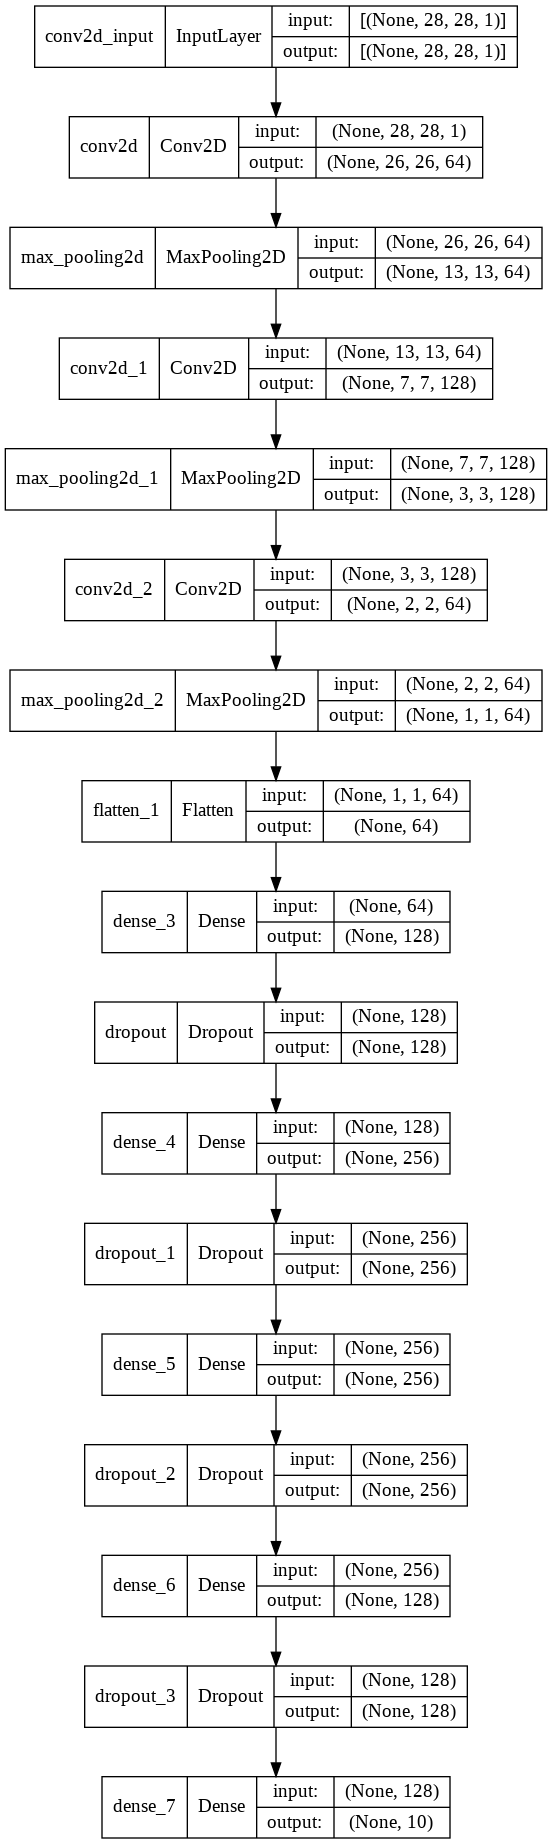

In [39]:
keras.utils.plot_model(model_Novo, to_file='model_plot.png', show_shapes=True, 
                       show_layer_names=True)

In [40]:
print(model_Novo.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)        

**Treinamento do novo modelo**

Antes que o modelo esteja pronto para o novo treinamento, ele precisa de mais algumas configurações. E elas serão adicionadas durante a etapa de compilação do modelo:

* Função Loss - Mede a precisão do modelo durante o treinamento. Desejamos minimizar esta função para "orientar" o modelo na direção certa.

* Optimizer - É assim que o modelo é atualizado com base nos dados que verifica na função de perda.

* Metrics — Usada para monitorar as etapas de treinamento e teste. O exemplo a seguir usa accuracy (precisão), a fração das imagens que são classificadas corretamente.


In [41]:
model_Novo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

O treinamento do modelo de rede neural requer as seguintes etapas:

Alimentando os dados de treinamento ao modelo. Neste exemplo, os dados de treinamento estão nas matrizes x_train e y_train.

* O modelo aprende a associar imagens e rótulos.

* Você pede ao modelo para fazer previsões sobre um conjunto de teste neste exemplo na matriz x_test.
 
* Posteriormente verificamo se as previsões correspondem aos rótulos da matriz y_test.

Para iniciar o treinamento, rodamos o método model.fit, assim é chamado porque "ajusta" o modelo aos dados de treinamento:

In [42]:
history_5 = model_Novo.fit(x_train, y_train, epochs = 20, batch_size = 512, 
                           verbose = 1, validation_data=(x_valid, y_valid))

Epoch 1/20
108/108 [==============================] - 8s 54ms/step - loss: 1.1441 - accuracy: 0.5474 - val_loss: 0.5377 - val_accuracy: 0.7928
Epoch 2/20
108/108 [==============================] - 5s 48ms/step - loss: 0.5679 - accuracy: 0.7850 - val_loss: 0.4336 - val_accuracy: 0.8346
Epoch 3/20
108/108 [==============================] - 5s 48ms/step - loss: 0.4667 - accuracy: 0.8279 - val_loss: 0.3840 - val_accuracy: 0.8578
Epoch 4/20
108/108 [==============================] - 5s 48ms/step - loss: 0.4038 - accuracy: 0.8552 - val_loss: 0.3447 - val_accuracy: 0.8788
Epoch 5/20
108/108 [==============================] - 5s 48ms/step - loss: 0.3588 - accuracy: 0.8714 - val_loss: 0.3491 - val_accuracy: 0.8738
Epoch 6/20
108/108 [==============================] - 5s 48ms/step - loss: 0.3231 - accuracy: 0.8851 - val_loss: 0.2902 - val_accuracy: 0.8976
Epoch 7/20
108/108 [==============================] - 5s 48ms/step - loss: 0.2996 - accuracy: 0.8934 - val_loss: 0.2807 - val_accuracy: 0.8980

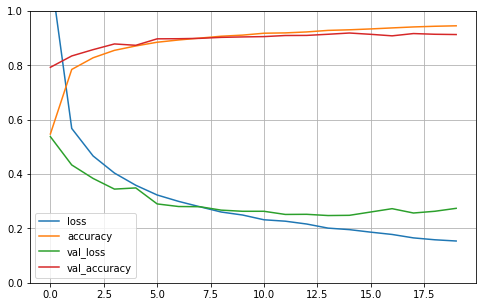

In [43]:
pd.DataFrame(history_5.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Text(0.5, 1.0, 'Evolução da precisão')

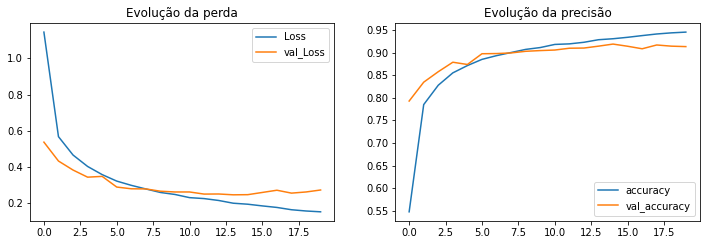

In [44]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_5.history['loss'], label='Loss')
plt.plot(history_5.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Evolução da perda')

plt.subplot(2, 2, 2)
plt.plot(history_5.history['accuracy'], label='accuracy')
plt.plot(history_5.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Evolução da precisão')

A precisão no conjunto de dados de teste era um pouco menor do que a precisão no conjunto de dados de treinamento. Essa lacuna entre a precisão do treinamento e a precisão do teste representa o overfitting.

Overfitting é quando um modelo de aprendizado de máquina tem um desempenho pior em entradas novas e inéditas do que nos dados de treinamento.

In [47]:
# Calculamos a perda e a precisão do teste 1º Treinamento

score = model_Novo.evaluate(x_train, y_train, verbose=0)
print('2º Treinamento loss:', score[0])
print('2º Treinamento accuracy:', score[1])

2º Treinamento loss: 0.12075801938772202
2º Treinamento accuracy: 0.9558908939361572


Depois de adicionar as camadas Dropout, a precisão do 2º treinamento e a validação da perda são muito melhores. Vamos verificar agora a previsão para o conjunto de teste.

In [46]:
# Calculamos a perda e a precisão do 2º teste
score = model_Novo.evaluate(x_test, y_test, verbose=0)
print('2º Teste loss:', score[0])
print('2º Teste accuracy:', score[1])

2º Teste loss: 0.2830318808555603
2º Teste accuracy: 0.909500002861023


Também a precisão do teste melhorou. A precisão do teste agora é de aproximadamente 0,90.

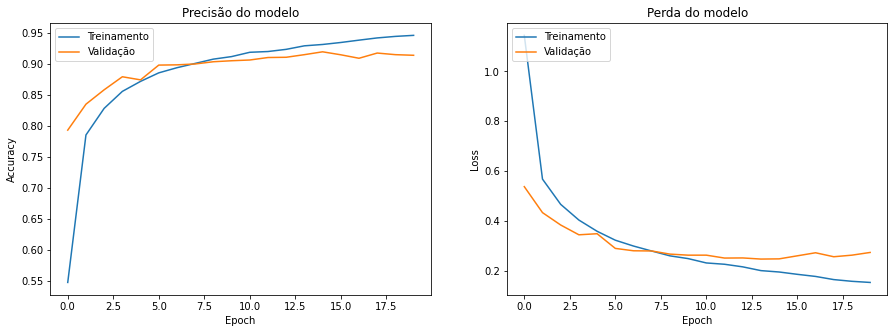

In [78]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 

    # resumindo o histórico da precisão
axs[0].plot(history_5.history['accuracy']) 
axs[0].plot(history_5.history['val_accuracy']) 
axs[0].set_title('Precisão do modelo')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['Treinamento', 'Validação'], loc='upper left')

    # resumindo a histórico da perda
axs[1].plot(history_5.history['loss']) 
axs[1].plot(history_5.history['val_loss']) 
axs[1].set_title('Perda do modelo')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

### Avaliando o desempenho e prevendo

**Fazendo previsões**

Com o modelo treinado, você pode usá-lo para fazer previsões sobre algumas imagens.

In [49]:
x_new = x_test[:] # considerando as três primeiras amostras do conjunto de dados de teste

In [50]:
y_proba = model_Novo.predict(x_new) # probabilidade para cada classe
y_proba.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.48, 0.  , 0.  ]], dtype=float32)

Agora com o modelo treinado, podemos usá-lo para fazer previsões sobre algumas imagens.

In [51]:
y_pred = np.argmax(model_Novo.predict(x_new), axis=-1)
y_pred

# categoria começa de 0 a 9
# primeira categoria de registro = 9 que pode ser confirmado pelas probabilidades acima
# categoria da segunda amostra = 2
# categoria da terceira amostra = 1

array([9, 2, 1, ..., 8, 1, 5])

In [52]:
pred_names = np.array(class_names)[y_pred]
pred_names

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44) Pullover


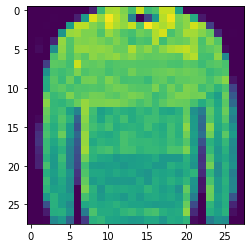

In [53]:
print(plt.imshow(x_test[20]))
print(plt.imshow(x_test[20]),pred_names[20])

AxesImage(54,36;334.8x217.44)


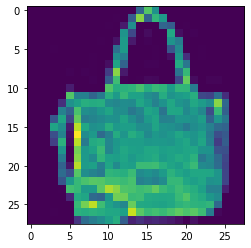

In [54]:
print(plt.imshow(x_test[2000]))

AxesImage(54,36;334.8x217.44)


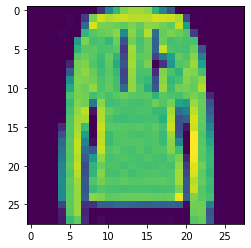

In [55]:
print(plt.imshow(x_test[525]))

Aqui, o modelo previu o rótulo para cada imagem no conjunto de teste. Vejamos a primeira previsão:

In [56]:
y_pred = model_Novo.predict(x_new)
print(y_pred)

[[3.03848808e-12 1.67645953e-10 3.07430448e-12 ... 3.29964350e-05
  2.82161849e-09 9.99957919e-01]
 [8.64436242e-06 2.02472986e-11 9.99530435e-01 ... 6.19042014e-12
  8.99181352e-09 1.05981914e-13]
 [4.33687910e-16 1.00000000e+00 3.68842006e-16 ... 1.63520217e-18
  2.68053833e-18 1.76024138e-18]
 ...
 [7.91634293e-12 1.38974873e-18 7.17142033e-16 ... 1.35331105e-13
  1.00000000e+00 9.36358162e-15]
 [5.28424970e-10 9.99999881e-01 5.11978515e-10 ... 1.57816780e-11
  2.14807928e-11 1.24815011e-11]
 [1.73868699e-04 1.50680629e-04 6.48258429e-05 ... 4.82727170e-01
  7.60939205e-04 1.84757332e-03]]


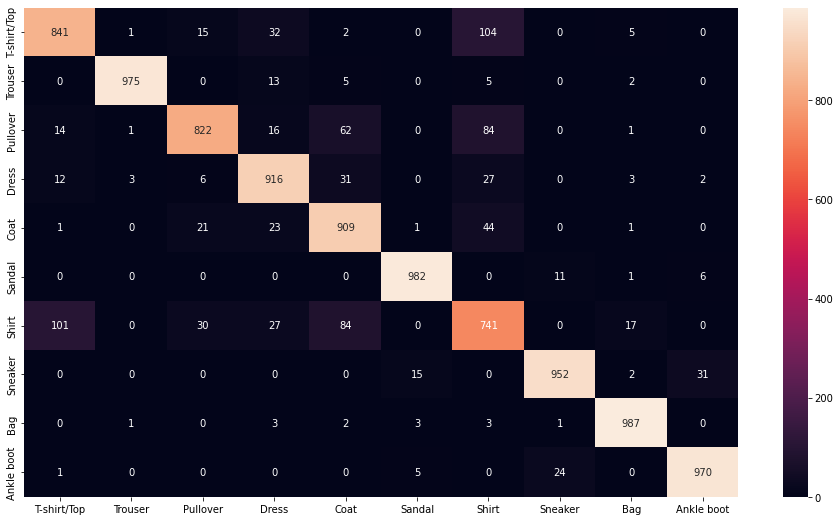

In [57]:
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm , annot = True, fmt = 'd', xticklabels = class_names, 
            yticklabels = class_names)

A previsão da matriz de 09 números representa a "confiança" do modelo de que a imagem corresponde a cada uma das 10 peças de roupa diferentes. Você pode ver qual rótulo tem o maior valor de confiança.

Vamos também inspecionar algumas das imagens. Criamos dois subconjuntos do conjunto de imagens previstas, classificadas real e previsto.

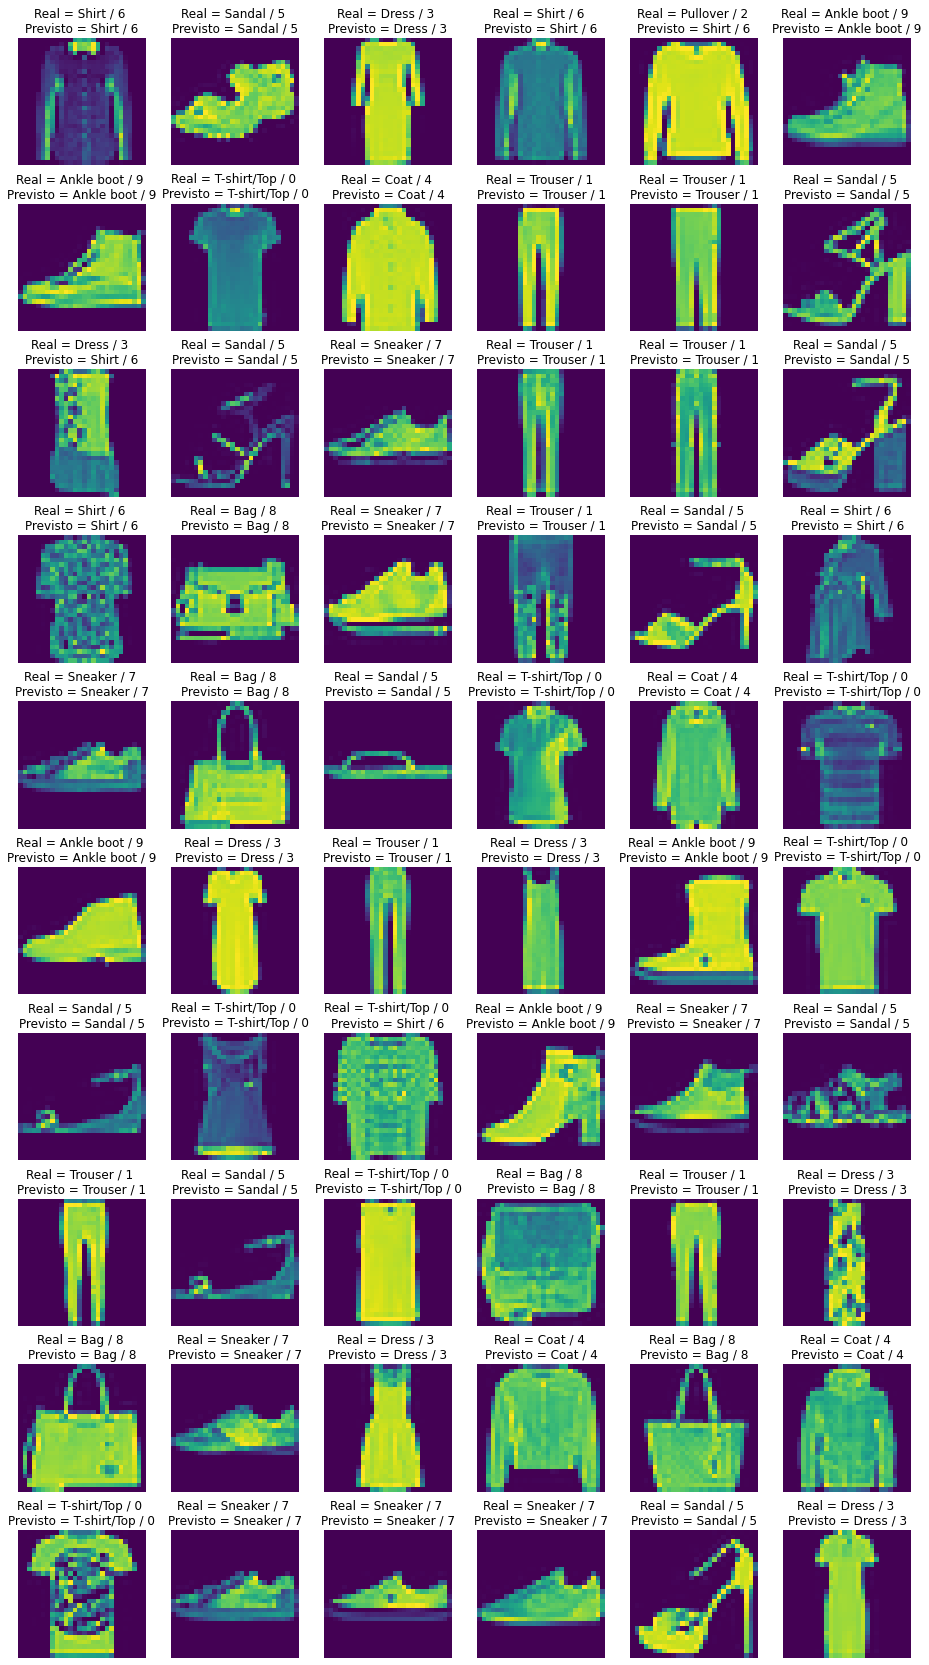

In [67]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(x_test[i].reshape(28,28))
  plt.axis('off')
  plt.title('Real = {} / {} \nPrevisto = {} / {}'.format(class_names[y_test[i]],
                                                            y_test[i],
                                                            class_names[np.argmax(y_pred[i])],
                                                            np.argmax(y_pred[i])))

In [75]:
# obter as previsões para os dados de teste
predicted_classes = model_Novo.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

O modelo está mais confiante, o exame da etiqueta de teste mostra que esta classificação está correta:

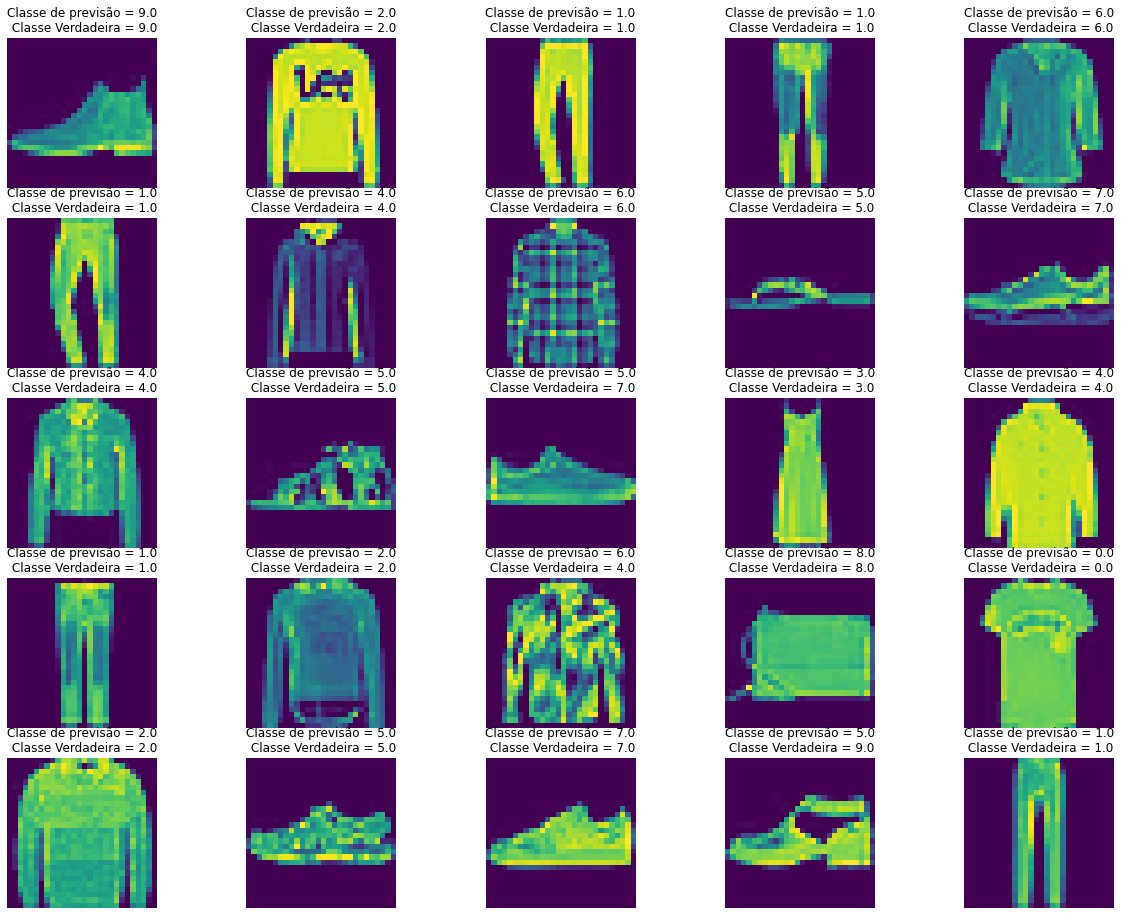

In [76]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (20,16))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Classe de previsão = {(predicted_classes[i]):0.1f}\n Classe Verdadeira = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [77]:
cr = classification_report (y_test, y_pred_labels, target_names = class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/Top       0.87      0.84      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.92      0.82      0.87      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.83      0.91      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.74      0.74      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



As melhores porcentagens de precisão são obtidas pelas classes Trouser, Pullover, Sandal, Sneaker, Bag e Ankle boot. A pior precisão é para Shirt.

O recall é maior para Bag, Sandal e menor para Shir e Pullover.

A pontuação f1 é mais alta para a Trouser, Sandal e Bag e menor para a Shirt, seguida por T-shirt/Top, Pullover e Coat.

**Conclusões**

Com um modelo sequencial complexo com múltiplas camadas, entre 20 e 30 épocas para o treinamento, obtivemos uma precisão de 0,95 para previsão do treinamento. Após investigar a precisão e a perda de validação, entendemos que o modelo estava com overfitting.

Retreinamos o modelo com camadas Dropout para o modelo para reduzir o overfitting.

Confirmamos a melhoria do modelo e com a redução do número de épocas para o treinamento, obtivemos um ótimo desempenho com o novo modelo, uma precisão de 0,91 para previsão do teste. Apenas algumas classes não são classificadas corretamente o tempo todo, especialmente para as classes Shirt e T-shirt/Top.

**Referências**

[1] Fashion MNIST, An MNIST-like dataset of 70,000 28x28 labeled fashion images, https://www.kaggle.com/zalando-research/fashionmnist

[2] DanB, CollinMoris, Deep Learning From Scratch, https://www.kaggle.com/dansbecker/deep-learning-from-scratch

[3] DanB, Dropout and Strides for Larger Models, https://www.kaggle.com/dansbecker/dropout-and-strides-for-larger-models

[4] BGO, CNN with Keras, https://www.kaggle.com/bugraokcu/cnn-with-keras

[5] NAIN, EagerFMINST, https://www.kaggle.com/aakashnain/eagerfmnist

[6] Why Dropounts prevent overfitting in Deep Neural Networks, https://medium.com/@vivek.yadav/why-dropouts-prevent-overfitting-in-deep-neural-networks-937e2543a701

[7] Dropout: A Simple Way to Prevent Neural Networks from Overfitting, https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf
